In [1]:
% cd "../"

/home/akali/projects/model-trainer


In [4]:
import importlib
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from generic_iterative_stemmer.utils import get_path, loader

log = logging.getLogger(__name__)
importlib.reload(loader)

<module 'generic_iterative_stemmer.utils.loader' from '/home/akali/projects/model-trainer/generic_iterative_stemmer/utils/loader.py'>

In [5]:
corpus_name = "wiki-he"
cbow_path = get_path(corpus_name, "cbow.kv")
cbow_model = loader.load_kv(cbow_path)

sg_path = get_path(corpus_name, "sg.kv")
sg_model = loader.load_kv(sg_path)

ft_path = get_path(corpus_name, "fasttext.kv")
ft_model = loader.load_kv(ft_path)

In [6]:
cbow_vocab = set(cbow_model.key_to_index.keys())
sg_vocab = set(sg_model.key_to_index.keys())
ft_vocab = set(ft_model.key_to_index.keys())
common_vocab = cbow_vocab.intersection(sg_vocab).intersection(ft_vocab)

s1, s2, s3 = len(cbow_vocab), len(sg_vocab), len(ft_vocab)
print(f"Common vocab: {len(common_vocab)}")

Common vocab: 576850


In [7]:
import random

representative = "אקדח"  # random.sample(common_vocab, k=1)[0]
print(f"Representative: {representative}")

others_count = 10000
random.seed(3)
others = random.sample(common_vocab, k=others_count)
print(f"Others: {others}")

Representative: אקדח
Others: ['הקאנוניים', 'חולוד', 'whites', 'המשקיים', 'לסנדאי', 'בחושים', 'הסער', 'לאסטרונום', 'למזוג', 'גלנר', 'קונסולארי', 'sobs', 'strathearn', 'צוין', 'וירטואליות', 'לאהדן', 'קריטריוני', 'שהמתקן', 'לורטון', 'pxארצות', 'מאדמותיה', 'ליבאדיה', 'לארנסט', 'כשמרקו', 'התאפקו', 'לחמדנות', 'מסורתה', 'קוזה', 'שכיכב', 'הירוקאזו', 'ולפסיקת', 'nahon', 'משוכנים', 'ולאלופת', 'kübler', 'טרטון', 'fossilis', 'הסכמיות', 'מלזרום', 'גרלאך', 'להחכרה', 'előadások', 'דמוקרטיה', 'קוראיה', 'וחליפות', 'שהשיעים', 'צירין', 'כפלא', 'שחלות', 'ולתקווה', 'לחציבת', 'horned', 'במנג', 'לניניסטיות', 'מיצירותיו', 'הריבניה', 'שוברת', 'כוות', 'להרסה', 'שפעמיים', 'קניו', 'בהט', 'וסיידה', 'monteverde', 'צעירותה', 'רומנסת', 'המניבות', 'syrup', 'ונוקה', 'להשמיע', 'אירוואדי', 'ומפעילת', 'באסטרגלים', 'הירידים', 'והמרבד', 'ניוונית', 'מדלקת', 'פורבו', 'ליני', 'ברלנגה', 'לשחיקתו', 'ימונו', 'החיוניים', 'בסמפטמבר', 'וכשלוחצים', 'שצעקו', 'סטילר', 'ותבוסות', 'דמפס', 'periophthalmus', 'וההיתר', 'myself', 'סמינריונית

In [115]:
from typing import List
from gensim.models import KeyedVectors


def representative_distances(model: KeyedVectors, representative: str, others: List[str]) -> np.ndarray:
    return model.distances(representative, other_words=others)


cbow_distances = representative_distances(cbow_model, representative, others)
sg_distances = representative_distances(sg_model, representative, others)
ft_distances = representative_distances(ft_model, representative, others)

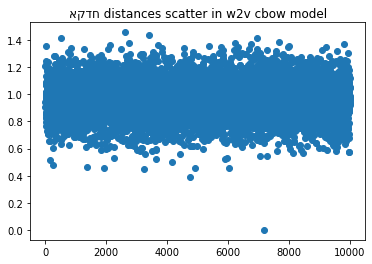

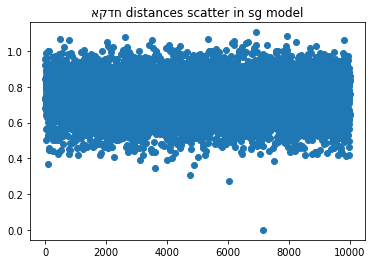

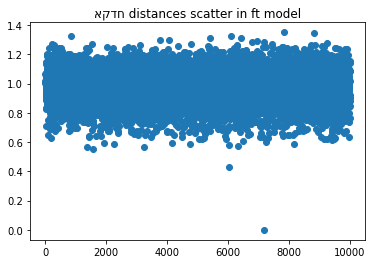

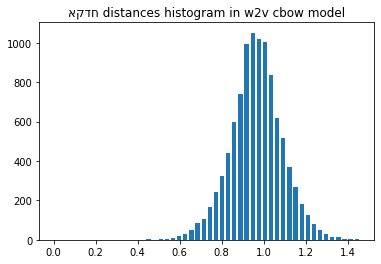

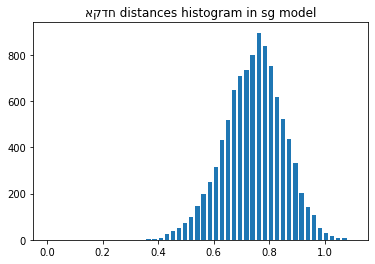

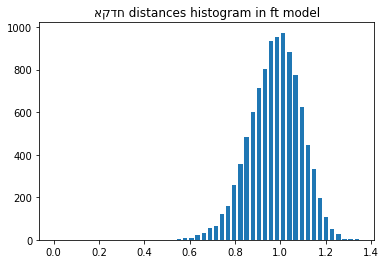

<Figure size 432x288 with 0 Axes>

In [9]:
def draw_distances_scatter(distances: np.ndarray, representative: str = None, model_name: str = None):
    x = np.arange(len(distances))
    plt.scatter(x, distances)
    if representative:
        title = f"{representative} distances scatter"
        if model_name:
            title += f" in {model_name} model"
        plt.title(title)
    plt.show()
    plt.clf()


def draw_distances_histogram(
    distances: np.ndarray, bins: int = None, representative: str = None, model_name: str = None
):
    if bins is None:
        bins = min(int(len(distances) / 10), 50)
    plt.hist(distances, bins=bins, rwidth=0.7)
    if representative:
        title = f"{representative} distances histogram"
        if model_name:
            title += f" in {model_name} model"
        plt.title(title)
    plt.show()
    plt.clf()


draw_distances_scatter(cbow_distances, representative=representative, model_name="w2v cbow")
draw_distances_scatter(sg_distances, representative=representative, model_name="sg")
draw_distances_scatter(ft_distances, representative=representative, model_name="ft")
draw_distances_histogram(cbow_distances, representative=representative, model_name="w2v cbow")
draw_distances_histogram(sg_distances, representative=representative, model_name="sg")
draw_distances_histogram(ft_distances, representative=representative, model_name="ft")

In [121]:
def edges(distances: np.ndarray, others: List[str], top_n: int = 15) -> List[str]:
    indexes = np.argsort(distances)[:top_n]
    return [others[i] for i in indexes]


print(f"For representative: {representative}")
edges1 = edges(cbow_distances, others=others)
edges2 = edges(sg_distances, others=others)
edges3 = edges(ft_distances, others=others)

df = pd.DataFrame()
df["w2v"] = edges1
df["sg"] = edges2
df["ft"] = edges3
df["q"] = "finito"

print(df)

For representative: אקדח
      w2v      sg     ft       q
0     כסף     רכב    רכב  finito
1     רכב    צבאי   כדור  finito
2    אותם    עליו    קול  finito
3    עצמו     כלי     יד  finito
4   השחקן     קול    כסף  finito
5    ממנו     כסף   הרכב  finito
6    כדור    אותם   עצמו  finito
7   בעזרת   בעזרת   אותם  finito
8     קול     אבל    דין  finito
9    עליו      יד    צבא  finito
10  במשחק    כדור  בעזרת  finito
11    סרט      צה   משחק  finito
12   משחק    ממנו  השחקן  finito
13    אני  חיילים    כוח  finito
14    קשר    מתחת    אני  finito


In [142]:
model = cbow_model
others = model.index_to_key[100:2000]

In [152]:
base_word = "גבר"
similarities: list = model.most_similar(base_word, topn=20)


def get_similarity(model, word):
    return word, model.similarity(base_word, word)


similarities.append(get_similarity(model, "קיפוד"))
similarities.append(get_similarity(model, "תפוח"))
similarities.append(get_similarity(model, "קילו"))
similarities.append(get_similarity(model, "פסיפס"))


def association_similarity(w1: str, w2: str, others):
    x1 = representative_distances(model, w1, others)
    x2 = representative_distances(model, w2, others)
    return (x1 @ x2) / len(others)


records = []
for similar_word, grade in similarities:
    association = association_similarity(base_word, similar_word, others)
    record = (f"x {similar_word} x", grade, association)
    records.append(record)

df = pd.DataFrame(data=records, columns=["word", "cosine_similarity", "association_similarity"])

print(df.sort_values("cosine_similarity", ascending=False))

               word  cosine_similarity  association_similarity
0          x הגבר x           0.660118                0.917707
1          x לגבר x           0.627117                0.936065
2          x כגבר x           0.595025                0.956912
3          x אישה x           0.585202                0.926183
4           x נער x           0.581398                0.947548
5          x זונה x           0.574883                0.941072
6          x וגבר x           0.564613                0.967697
7           x ילד x           0.558664                0.923151
8          x בגבר x           0.554395                0.963719
9          x מאהב x           0.544915                0.939211
10         x שוכב x           0.536226                0.956480
11         x בחור x           0.534557                0.948252
12        x וכועס x           0.533998                0.996438
13       x פדופיל x           0.533490                0.969852
14   x הומוסקסואל x           0.532032                0